In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import seaborn as sns

# A-Z Dataset

In [2]:
data_letters = pd.read_csv('H:\Dataset for handwritten\A-Z Dataset\A_Z Handwritten Data\A_Z Handwritten Data.csv').astype('int32')

In [3]:
data_letters.rename(columns={'0':'label'}, inplace=True)

In [4]:
X_letters_full = data_letters.drop('label', axis=1).to_numpy()
y_letters_full = data_letters['label'].to_numpy()

In [5]:
X_letters_full = X_letters_full.reshape(X_letters_full.shape[0],28,28)

0


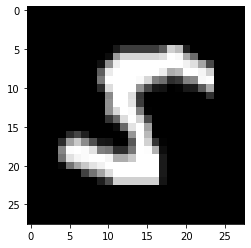

(372450, 28, 28)

In [6]:
print(y_letters_full[3001])
plt.imshow(X_letters_full[280001], cmap='gray')
plt.show()
X_letters_full.shape

# MNIST Dataset

In [7]:
(X_mnist_train, y_mnist_train), (X_mnist_test, y_mnist_test) = keras.datasets.mnist.load_data(path="mnist.npz")

In [8]:
X_mnist_full = np.concatenate((X_mnist_train, X_mnist_test))
y_mnist_full = np.concatenate((y_mnist_train, y_mnist_test))

In [9]:
np.unique(y_mnist_full).shape

(10,)

9


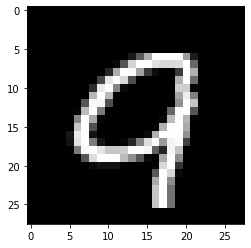

In [10]:
print(y_mnist_full[3000])
plt.imshow(X_mnist_full[3000], cmap='gray')
plt.show()

# Merging Two Datasets

A-Z Handwritten + MNIST

In [11]:
y_letters_full = y_letters_full+10

print(np.unique(y_mnist_full))
print(np.unique(y_letters_full))

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35]


In [12]:
X_data_full = np.concatenate((X_mnist_full, X_letters_full))
y_data_full = np.concatenate((y_mnist_full, y_letters_full))

In [13]:
np.unique(y_data_full).shape

(36,)

In [14]:
permutation = np.random.permutation(X_data_full.shape[0])

X_data_full = X_data_full[permutation]
y_data_full = y_data_full[permutation]

In [15]:
X_data_full = X_data_full / 255.0

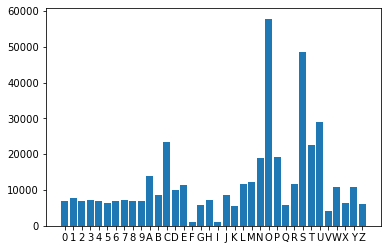

In [16]:
import string

unique_values, frequency_count = np.unique(y_data_full, return_counts=True)
label = ["%d" %i for i in range(0,10)] + list(string.ascii_uppercase)
plt.bar(label, frequency_count)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data_full, y_data_full, test_size=0.1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1)

In [18]:
np.unique(y_train).shape

(36,)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

(358384, 28, 28)
(44245, 28, 28)
(39821, 28, 28)


In [20]:
y_train

array([30,  8, 21, ..., 22, 32, 30])

In [21]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
X_valid = X_valid.reshape(X_valid.shape[0], 28, 28, 1).astype('float32')

y_train_cat = keras.utils.to_categorical(y_train)
y_test_cat = keras.utils.to_categorical(y_test)
y_valid_cat = keras.utils.to_categorical(y_valid)

In [22]:
y_train_cat.shape[1]

36

23


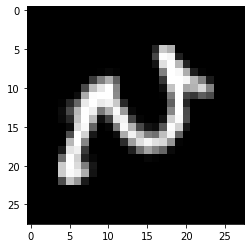

In [23]:
print(y_train[3009])
plt.imshow(X_train[3009], cmap='gray')
plt.show()

In [28]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=64, kernel_size=(7,7), padding='valid', activation='relu'))
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(36, activation='softmax'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          100416    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1

In [30]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train,y_train_cat , epochs=20,  validation_data = (X_valid,y_valid_cat))

Epoch 1/20
11200/11200 [==============================] - 472s 42ms/step - loss: 0.1554 - accuracy: 0.9550 - val_loss: 0.0795 - val_accuracy: 0.9765
Epoch 2/20
11200/11200 [==============================] - 468s 42ms/step - loss: 0.0753 - accuracy: 0.9779 - val_loss: 0.0528 - val_accuracy: 0.9838
Epoch 3/20
11200/11200 [==============================] - 470s 42ms/step - loss: 0.0563 - accuracy: 0.9831 - val_loss: 0.0512 - val_accuracy: 0.9849
Epoch 4/20
11200/11200 [==============================] - 467s 42ms/step - loss: 0.0465 - accuracy: 0.9857 - val_loss: 0.0562 - val_accuracy: 0.9840
Epoch 5/20
11200/11200 [==============================] - 475s 42ms/step - loss: 0.0398 - accuracy: 0.9876 - val_loss: 0.0566 - val_accuracy: 0.9858
Epoch 6/20
11200/11200 [==============================] - 475s 42ms/step - loss: 0.0376 - accuracy: 0.9888 - val_loss: 0.0532 - val_accuracy: 0.9869
Epoch 7/20
11200/11200 [==============================] - 482s 43ms/step - loss: 0.0348 - accuracy: 0.9896

Text(0, 0.5, 'Accuracy')

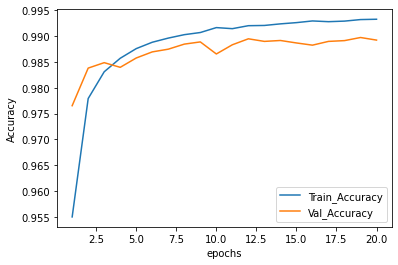

In [31]:
q = len(history.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history.history['accuracy'], label='Train_Accuracy')
sns.lineplot(x = range(1,1+q),y = history.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

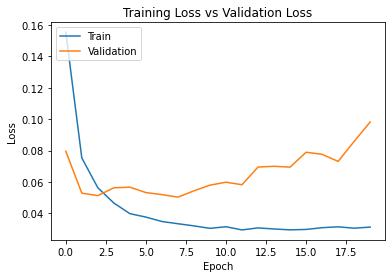

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [34]:
model.evaluate(X_test, y_test_cat)

1383/1383 [==============================] - 14s 10ms/step - loss: 0.0831 - accuracy: 0.9894


[0.0831165537238121, 0.9893773198127747]

In [36]:
model.save('H:\HCR\JANABHATTS1.h5')